# Data Clustering

## What is data clustering

Data clustering means to aggregate data into different separated groups based on the data characteristics. The issues is: how to characterize data, and what is the criterior to put them into different groups?  
Data clustering can happen in very different ways. Sometimes obvious, the data can have natural criterior, for example human related data can be grouped in gender, or age, or location, maybe for business data can group in different industries, different states or locations, etc. But also in many cases, data seems don't have an obvious way to differentiate them or group them. Then we need some special technique to analyze and find unseen rules which is hidden from us, among all the data.

Let's first study a data clustering based on geographic location.

## John Snow's cholera data - Distance on data clustering

In 1854, there was an outbreak of cholera in North-western London, in the neighborhood around Broad Street. People did not know much about the disease at that time, and dont know how to control it. John Snow, a physician at that time, collected many data, including the location of those people who dead because of the disease. When he map all location on the map, it leaded him to connect it to the water pump on the map, and thus comes the idea that this disease maybe spread by water.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')
plt.rcParams.update({'figure.figsize': (12,6),\
                     'figure.titlesize':16,\
                     'axes.titlesize':16,\
                     'axes.labelsize':14,\
                     'xtick.labelsize':14,\
                     'ytick.labelsize':14,
                    })

In [8]:
import pathlib

file_dir = pathlib.Path('D:/Edu/data_resource/data-Snow-Cholera/')
file_1 = file_dir/'snow_cholera_pumps.csv'
file_2 = file_dir/'snow_cholera_deaths.csv'

df_pumps = pd.read_csv(file_1)
df_pumps

,x,y
0,8.7,17.9
1,11.0,18.5
2,13.4,17.4
3,14.9,17.8
4,8.7,14.9
5,8.9,12.8
6,12.6,11.7
7,10.7,7.4
8,13.5,8.0
9,16.4,9.3


In [9]:
df_deaths = pd.read_csv(file_2)
df_deaths

,x,y
0,13.6,11.1
1,9.9,12.6
2,14.7,10.2
3,15.2,10.0
4,13.2,13.0
...,...,...
573,12.4,11.5
574,15.1,10.2
575,17.3,11.6
576,12.4,11.9


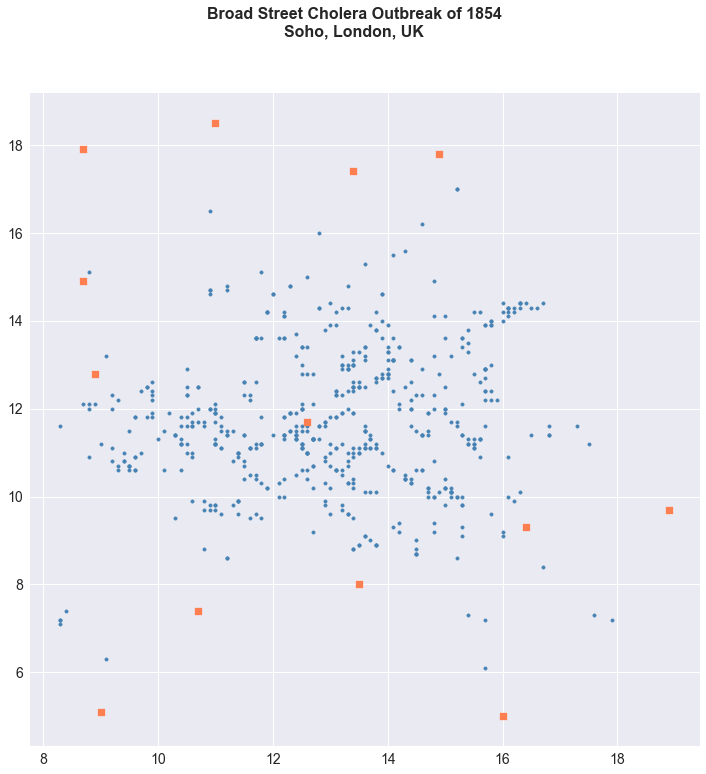

In [10]:
fig, ax = plt.subplots()

fig.suptitle('Broad Street Cholera Outbreak of 1854'+'\n'+'Soho, London, UK',fontweight='bold')
fig.set_size_inches((12,12))
ax.scatter(df_deaths['x'], df_deaths['y'], marker='.', color='steelblue')
ax.scatter(df_pumps['x'], df_pumps['y'], marker='s', color='coral')
plt.show()

We can group the death location point according to distance to the pump location. Then draw it on the map with different color.

In [11]:
deaths_tmp = df_deaths.to_numpy()
idx_arr = np.array([-999 for _ in range(len(df_deaths))], dtype='int')
for i in range(len(df_deaths)):
    idx_arr[i] = (df_pumps - deaths_tmp[i]).apply(lambda x:x**2).sum(axis=1).idxmin()
df_deaths['Pump'] = idx_arr
df_deaths

,x,y,Pump
0,13.6,11.1,6
1,9.9,12.6,5
2,14.7,10.2,9
3,15.2,10.0,9
4,13.2,13.0,6
...,...,...,...
573,12.4,11.5,6
574,15.1,10.2,9
575,17.3,11.6,9
576,12.4,11.9,6


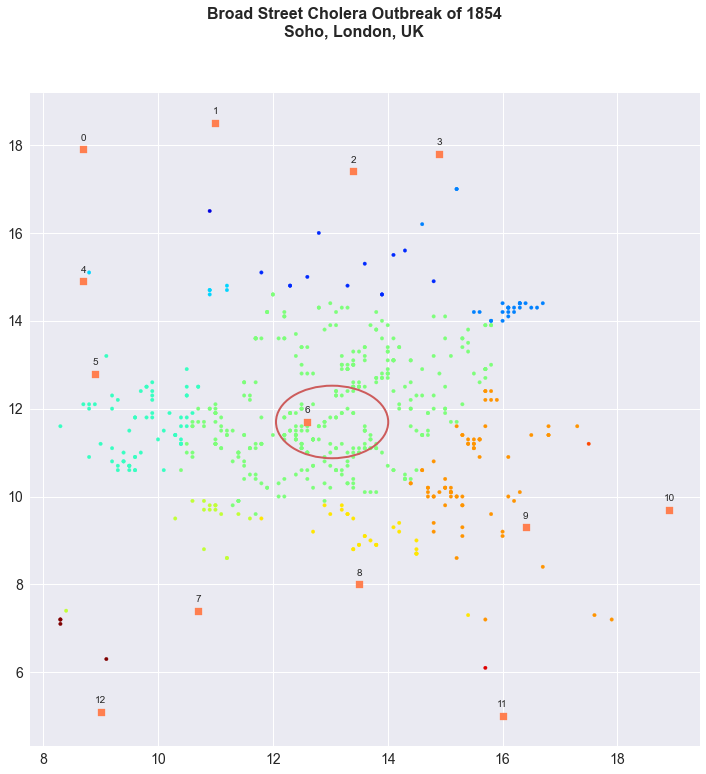

In [12]:
import matplotlib.patches as mpatches

fig = plt.figure(figsize=(12,12))
fig.suptitle('Broad Street Cholera Outbreak of 1854'+'\n'+'Soho, London, UK',fontweight='bold')
ax = fig.add_subplot(111)

ax.scatter(df_deaths['x'], df_deaths['y'], c=df_deaths['Pump'], vmin=0., vmax=12., cmap='jet', marker='.')
ax.scatter(df_pumps['x'], df_pumps['y'], marker='s', color='coral')

for i in df_pumps.index:
    ax.text(df_pumps[['x']].loc[i], df_pumps[['y']].loc[i]+0.2, s=f'{i}', ha='center', transform=ax.transData)

ellipse = mpatches.Ellipse(xy=(df_deaths['x'].mean(), df_deaths['y'].mean()), width=df_deaths['x'].std(), height=df_deaths['y'].std(), zorder=32, fc='None', ec='IndianRed', lw=2)
ax.add_artist(ellipse)
plt.show()

This clustering is based on 'Euclidean distance'. If combined with actual street data can do clustering study of 'walking distance'.

## k-means clustering

k-means clustering is an algorithm that for a set of $n$ observation data, to cluster them into $k$ clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid).  
We use the data which we created for the WHO suicide rate, shunshine duration, and GDP, for different countries.  

Here’s a brief overview of how K-means works: 

1. Decide the number of clusters (k)
2. Select k random points from the data as centroids
3. Assign all the points to the nearest cluster centroid
4. Calculate the centroid of newly formed clusters
5. Repeat steps 3 and 4

In [13]:
# here we use the result data from the study of WHO data
dir = pathlib.Path.cwd()
file_path = dir/'..'/'UnitB1'/'final_data.csv'

df = pd.read_csv(file_path,index_col=0)
df

,Both sexes,Year,NY.GDP.PCAP.PP.KD
Afghanistan,6.0,3175.100000,2065.036235
Albania,3.7,2544.000000,13671.488422
Algeria,2.6,3266.500000,11510.557088
Angola,12.6,2341.000000,6670.331458
Argentina,8.1,2220.300000,22063.904372
...,...,...,...
Uruguay,18.8,2481.400000,23032.734044
Uzbekistan,8.3,2823.900000,7014.324699
Vietnam,7.2,2123.500000,8041.178384
Zambia,14.4,2965.466667,3470.448024


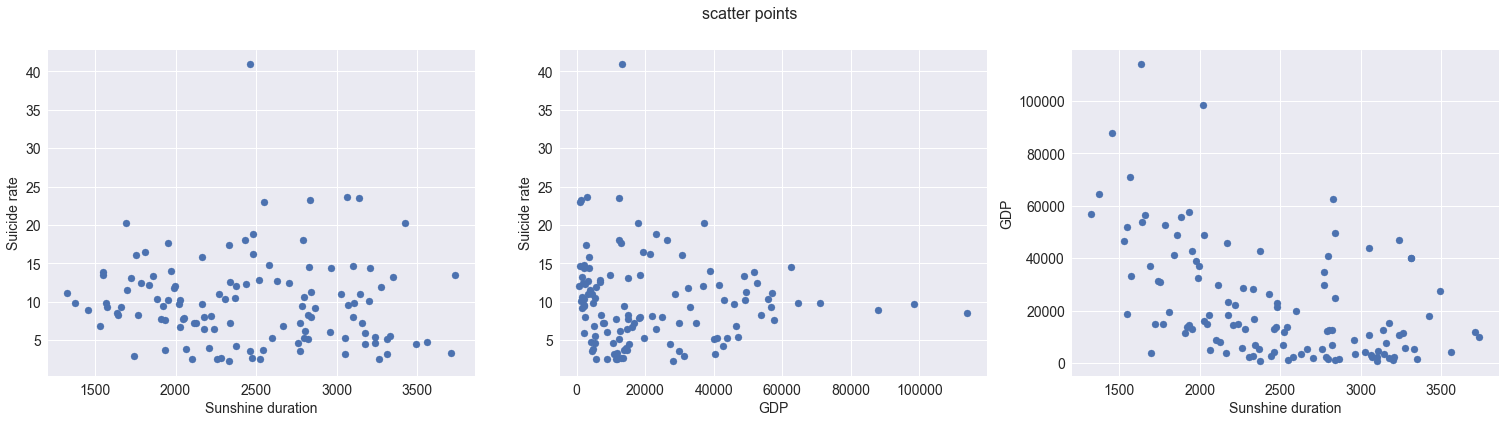

In [14]:
fig, axes = plt.subplots(1,3, figsize = (26, 6))

fig.suptitle('scatter points')

axes[0].scatter(df['Year'], df['Both sexes'])
axes[0].set_ylabel('Suicide rate')
axes[0].set_xlabel('Sunshine duration')

axes[1].scatter(df['NY.GDP.PCAP.PP.KD'], df['Both sexes'])
axes[1].set_ylabel('Suicide rate')
axes[1].set_xlabel('GDP')

axes[2].scatter(df['Year'], df['NY.GDP.PCAP.PP.KD'])
axes[2].set_ylabel('GDP')
axes[2].set_xlabel('Sunshine duration')

plt.show()

Normally due different feature (column data) has different unit and variance, we need "whiten" it before use K-means algorithm.

### K-means using SciPy stats

In [15]:
import scipy.stats as st
import scipy.cluster as sc

df_w = sc.vq.whiten(df)
df_w

array([[1.04331888, 5.45664131, 0.09468723],
       [0.64337998, 4.37204985, 0.62687298],
       [0.45210485, 5.61371889, 0.52778871],
       [2.19096965, 4.02317952, 0.30585189],
       [1.40848049, 3.81574776, 1.01168688],
       [0.4694935 , 4.25174974, 0.62606024],
       [1.96491722, 4.88687706, 2.26766391],
       [1.80841939, 3.23779164, 2.56010143],
       [0.69554592, 3.79357816, 0.66207918],
       [0.67815727, 3.55057193, 0.21797062],
       [2.86912692, 3.10546151, 0.88418062],
       [2.41702207, 2.65691394, 2.37253736],
       [2.2083583 , 4.52064914, 0.15073161],
       [1.44325778, 3.04015574, 0.68305622],
       [3.5125069 , 5.88897701, 0.81511248],
       [1.11287347, 3.84544782, 0.67696157],
       [1.13026212, 3.74133354, 1.06339347],
       [2.50396531, 5.51490094, 0.09988172],
       [2.10402641, 4.07886129, 0.03446574],
       [2.76479503, 3.72092549, 0.16700775],
       [1.79103074, 3.48534254, 2.24708548],
       [3.99938904, 4.37634629, 0.0433372 ],
       [2.

In [16]:
df_w.mean(axis=0)

array([1.73608846, 4.23325818, 1.01685545])

In [17]:
df_w.std(axis=0)

array([1., 1., 1.])

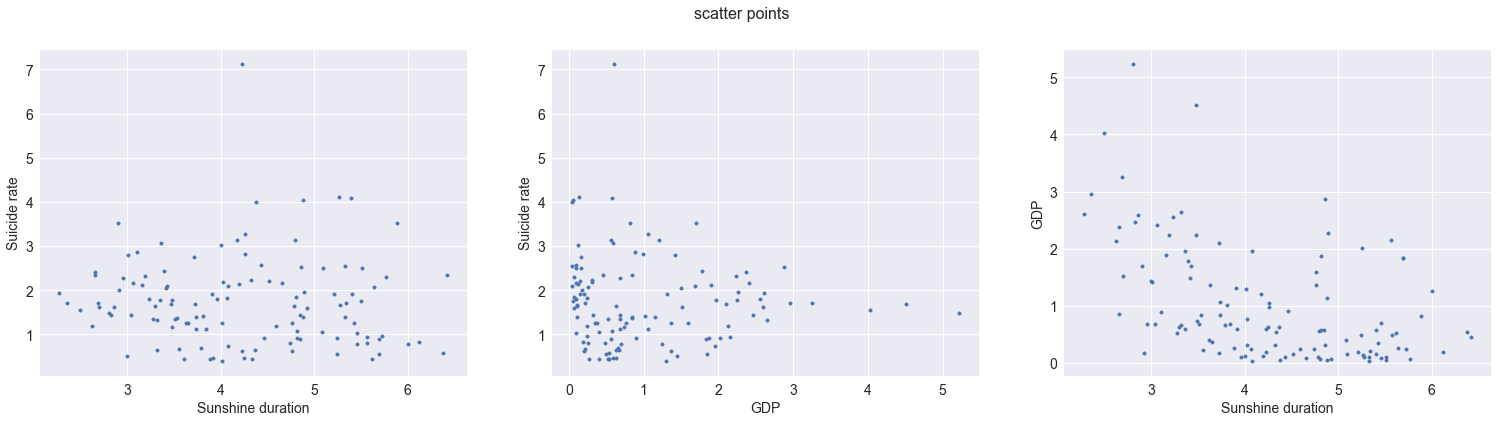

In [18]:
fig, axes = plt.subplots(1,3, figsize = (26, 6))

fig.suptitle('scatter points')

# column 0 is suicide rate.
# column 1 is yearly sunshine duration 
# column 2 is GDP PPP

axes[0].scatter(df_w.T[1], df_w.T[0], marker='.')
axes[0].set_ylabel('Suicide rate')
axes[0].set_xlabel('Sunshine duration')

axes[1].scatter(df_w.T[2], df_w.T[0], marker='.')
axes[1].set_ylabel('Suicide rate')
axes[1].set_xlabel('GDP')

axes[2].scatter(df_w.T[1], df_w.T[2], marker='.')
axes[2].set_ylabel('GDP')
axes[2].set_xlabel('Sunshine duration')

plt.show()

In [19]:
centroid, label = sc.vq.kmeans2(df_w, 2)

In [20]:
centroid

array([[1.91622901, 4.9836922 , 0.44010809],
       [1.55289468, 3.47010494, 1.60337819]])

In [21]:
label

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0])

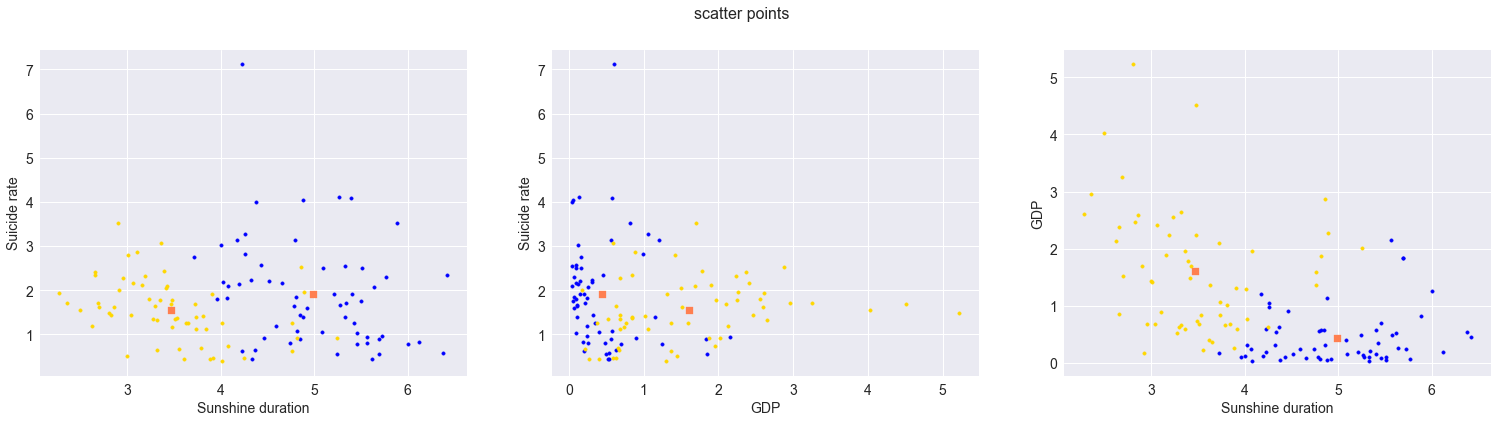

In [22]:
s0 = (label==0)
s1 = (label==1)

fig, axes = plt.subplots(1,3, figsize = (26, 6))

fig.suptitle('scatter points')

# column 0 is suicide rate.
# column 1 is yearly sunshine duration 
# column 2 is GDP PPP

axes[0].scatter(df_w.T[1][s0], df_w.T[0][s0], marker='.', color = 'blue')
axes[0].scatter(df_w.T[1][s1], df_w.T[0][s1], marker='.', color = 'gold')
axes[0].scatter(centroid.T[1], centroid.T[0], marker='s', color = 'coral')
axes[0].set_ylabel('Suicide rate')
axes[0].set_xlabel('Sunshine duration')

axes[1].scatter(df_w.T[2][s0], df_w.T[0][s0], marker='.', color = 'blue')
axes[1].scatter(df_w.T[2][s1], df_w.T[0][s1], marker='.', color = 'gold')
axes[1].scatter(centroid.T[2], centroid.T[0], marker='s', color = 'coral')
axes[1].set_ylabel('Suicide rate')
axes[1].set_xlabel('GDP')

axes[2].scatter(df_w.T[1][s0], df_w.T[2][s0], marker='.', color = 'blue')
axes[2].scatter(df_w.T[1][s1], df_w.T[2][s1], marker='.', color = 'gold')
axes[2].scatter(centroid.T[1], centroid.T[2], marker='s', color = 'coral')
axes[2].set_ylabel('GDP')
axes[2].set_xlabel('Sunshine duration')

plt.show()

In [23]:
centroid2, label2 = sc.vq.kmeans2(df_w, 2)

In [24]:
centroid2

array([[1.54648913, 4.72032931, 0.53965965],
       [2.11054715, 3.2712927 , 1.95931715]])

In [25]:
label2

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0])

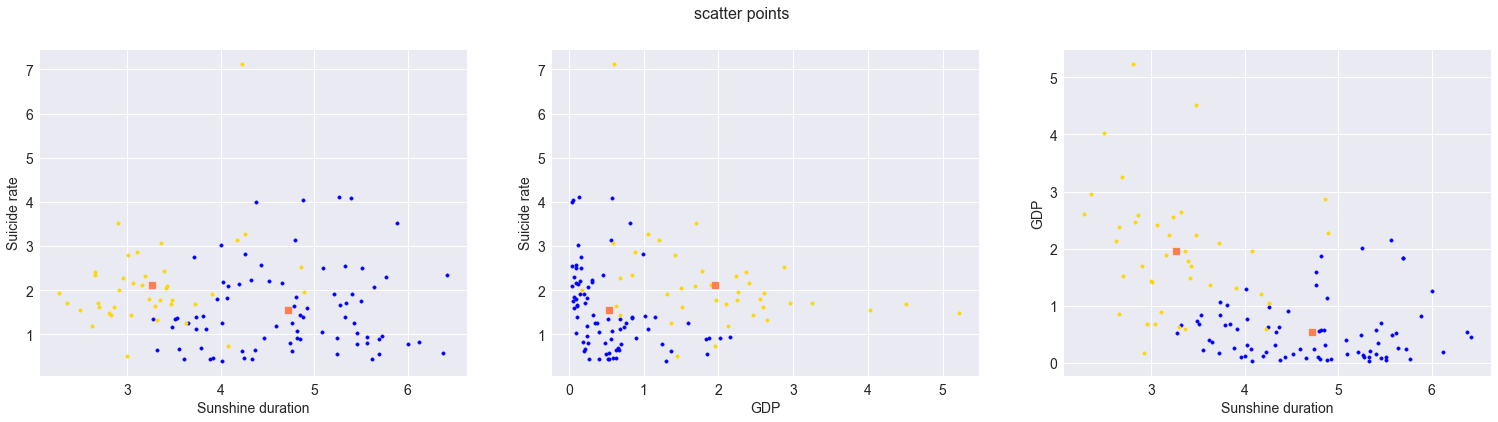

In [26]:
s0 = (label2==0)
s1 = (label2==1)

fig, axes = plt.subplots(1,3, figsize = (26, 6))

fig.suptitle('scatter points')

# column 0 is suicide rate.
# column 1 is yearly sunshine duration 
# column 2 is GDP PPP

axes[0].scatter(df_w.T[1][s0], df_w.T[0][s0], marker='.', color = 'blue')
axes[0].scatter(df_w.T[1][s1], df_w.T[0][s1], marker='.', color = 'gold')
axes[0].scatter(centroid2.T[1], centroid2.T[0], marker='s', color = 'coral')
axes[0].set_ylabel('Suicide rate')
axes[0].set_xlabel('Sunshine duration')

axes[1].scatter(df_w.T[2][s0], df_w.T[0][s0], marker='.', color = 'blue')
axes[1].scatter(df_w.T[2][s1], df_w.T[0][s1], marker='.', color = 'gold')
axes[1].scatter(centroid2.T[2], centroid2.T[0], marker='s', color = 'coral')
axes[1].set_ylabel('Suicide rate')
axes[1].set_xlabel('GDP')

axes[2].scatter(df_w.T[1][s0], df_w.T[2][s0], marker='.', color = 'blue')
axes[2].scatter(df_w.T[1][s1], df_w.T[2][s1], marker='.', color = 'gold')
axes[2].scatter(centroid2.T[1], centroid2.T[2], marker='s', color = 'coral')
axes[2].set_ylabel('GDP')
axes[2].set_xlabel('Sunshine duration')

plt.show()

In [27]:
centroid3, label3 = sc.vq.kmeans2(df_w, 2)

In [28]:
centroid3

array([[1.634861  , 3.35483953, 1.65984182],
       [1.81737718, 4.93865497, 0.50051791]])

In [29]:
label3

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1])

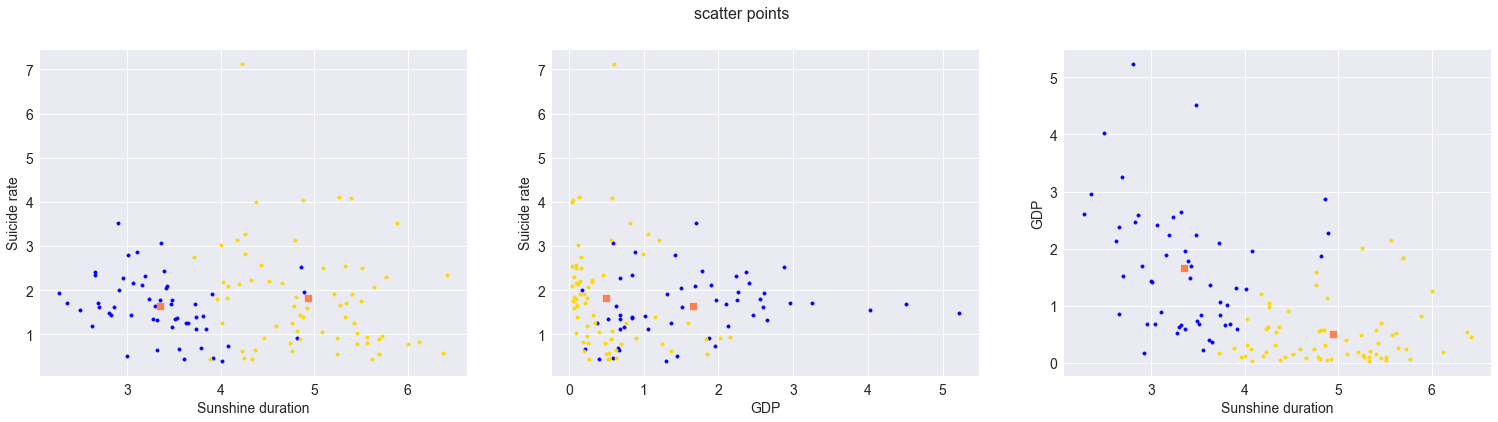

In [30]:
s0 = (label3==0)
s1 = (label3==1)

fig, axes = plt.subplots(1,3, figsize = (26, 6))

fig.suptitle('scatter points')

# column 0 is suicide rate.
# column 1 is yearly sunshine duration 
# column 2 is GDP PPP

axes[0].scatter(df_w.T[1][s0], df_w.T[0][s0], marker='.', color = 'blue')
axes[0].scatter(df_w.T[1][s1], df_w.T[0][s1], marker='.', color = 'gold')
axes[0].scatter(centroid3.T[1], centroid3.T[0], marker='s', color = 'coral')
axes[0].set_ylabel('Suicide rate')
axes[0].set_xlabel('Sunshine duration')

axes[1].scatter(df_w.T[2][s0], df_w.T[0][s0], marker='.', color = 'blue')
axes[1].scatter(df_w.T[2][s1], df_w.T[0][s1], marker='.', color = 'gold')
axes[1].scatter(centroid3.T[2], centroid3.T[0], marker='s', color = 'coral')
axes[1].set_ylabel('Suicide rate')
axes[1].set_xlabel('GDP')

axes[2].scatter(df_w.T[1][s0], df_w.T[2][s0], marker='.', color = 'blue')
axes[2].scatter(df_w.T[1][s1], df_w.T[2][s1], marker='.', color = 'gold')
axes[2].scatter(centroid3.T[1], centroid3.T[2], marker='s', color = 'coral')
axes[2].set_ylabel('GDP')
axes[2].set_xlabel('Sunshine duration')

plt.show()

### K-means clustering using SciKit Learn

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(df)
scaler

StandardScaler()

In [32]:
df_scaled = scaler.transform(df)
df_scaled

array([[-6.92769582e-01,  1.22338313e+00, -9.22168215e-01],
       [-1.09270849e+00,  1.38791674e-01, -3.89982468e-01],
       [-1.28398361e+00,  1.38046071e+00, -4.89066739e-01],
       [ 4.54881187e-01, -2.10078656e-01, -7.11003559e-01],
       [-3.27607973e-01, -4.17510424e-01, -5.16856618e-03],
       [-1.26659497e+00,  1.84915604e-02, -3.90795207e-01],
       [ 2.28828763e-01,  6.53618876e-01,  1.25080846e+00],
       [ 7.23309308e-02, -9.95466543e-01,  1.54324598e+00],
       [-1.04054254e+00, -4.39680016e-01, -3.54776264e-01],
       [-1.05793119e+00, -6.82686246e-01, -7.98884832e-01],
       [ 1.13303846e+00, -1.12779667e+00, -1.32674828e-01],
       [ 6.80933611e-01, -1.57634424e+00,  1.35568192e+00],
       [ 4.72269835e-01,  2.87390958e-01, -8.66123834e-01],
       [-2.92830677e-01, -1.19310244e+00, -3.33799231e-01],
       [ 1.77641844e+00,  1.65571883e+00, -2.01742970e-01],
       [-6.23214990e-01, -3.87810357e-01, -3.39893879e-01],
       [-6.05826342e-01, -4.91924637e-01

In [33]:
df_scaled.std(axis=0)

array([1., 1., 1.])

In [34]:
df_scaled.mean(axis=0)

array([-3.13474736e-16, -1.26696039e-15,  3.93709342e-16])

In [35]:
from sklearn.cluster import KMeans

kmeans = KMeans(init="random", n_clusters=2, n_init=10, max_iter=300)
kmeans.fit(df_scaled)

KMeans(init='random', n_clusters=2)

In [36]:
kmeans.cluster_centers_

array([[-0.1824879 ,  0.4473393 , -0.48059893],
       [ 0.38898736, -0.95353903,  1.02443457]])

In [37]:
kmeans.inertia_

239.20390789131238

In [38]:
kmeans.n_iter_

5

In [39]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0])

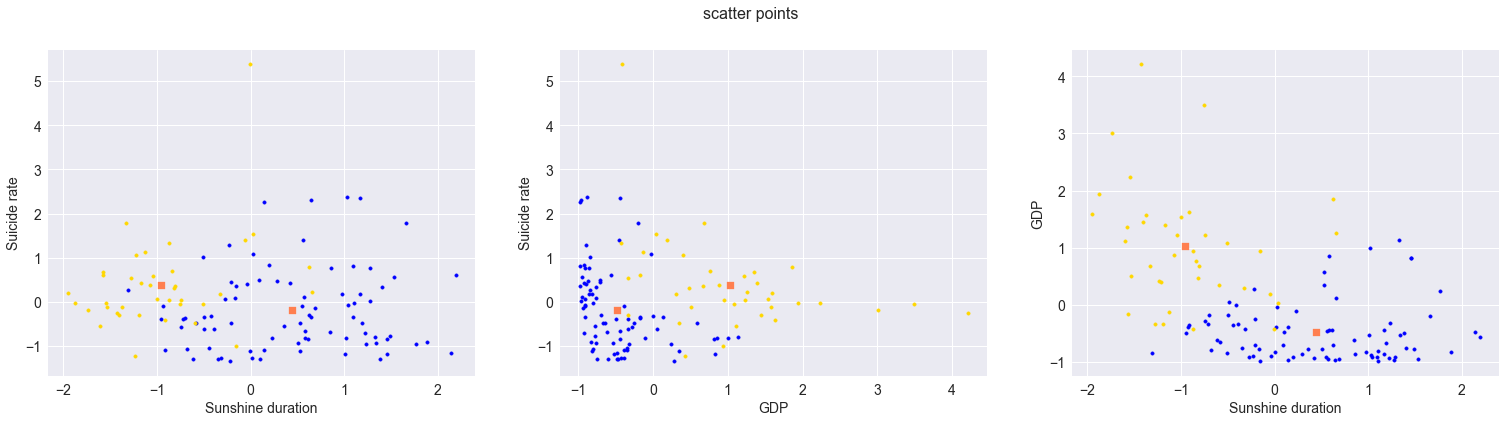

In [40]:
s0 = (kmeans.labels_==0)
s1 = (kmeans.labels_==1)

fig, axes = plt.subplots(1,3, figsize = (26, 6))

fig.suptitle('scatter points')

# column 0 is suicide rate.
# column 1 is yearly sunshine duration 
# column 2 is GDP PPP

axes[0].scatter(df_scaled.T[1][s0], df_scaled.T[0][s0], marker='.', color = 'blue')
axes[0].scatter(df_scaled.T[1][s1], df_scaled.T[0][s1], marker='.', color = 'gold')
axes[0].scatter(kmeans.cluster_centers_.T[1], kmeans.cluster_centers_.T[0], marker='s', color = 'coral')
axes[0].set_ylabel('Suicide rate')
axes[0].set_xlabel('Sunshine duration')

axes[1].scatter(df_scaled.T[2][s0], df_scaled.T[0][s0], marker='.', color = 'blue')
axes[1].scatter(df_scaled.T[2][s1], df_scaled.T[0][s1], marker='.', color = 'gold')
axes[1].scatter(kmeans.cluster_centers_.T[2], kmeans.cluster_centers_.T[0], marker='s', color = 'coral')
axes[1].set_ylabel('Suicide rate')
axes[1].set_xlabel('GDP')

axes[2].scatter(df_scaled.T[1][s0], df_scaled.T[2][s0], marker='.', color = 'blue')
axes[2].scatter(df_scaled.T[1][s1], df_scaled.T[2][s1], marker='.', color = 'gold')
axes[2].scatter(kmeans.cluster_centers_.T[1], kmeans.cluster_centers_.T[2], marker='s', color = 'coral')
axes[2].set_ylabel('GDP')
axes[2].set_xlabel('Sunshine duration')

plt.show()

For a given group of data, if we don't have any previous knowledge about it, how many clusters best fit is not clear. There is a method called elbow method to decide how many clusters would possibly best fit. For this mothod, we try different amount of clusters, and select one as best. (WCSS is within cluster sum of squares)  

![elbow method](43191elbow_img.png)  
  
Another way is to use silhouette_score which scikit learn has a function to give it. using different clusters to run the K-means and get silhouette_score for each, then choose the highest score and that cluster number can be taken as the best choice.  
scikit-learn silhouette_score is calcultion of average silhouette_coefficient of all the samples. For each specific sample point, the silhouette_coefficient is calculated as: $\frac{(b - a)} {max(a, b)}$, where $a$ is mean intra-cluster distance for the sample, and $b$ is mean nearest cluster distance for the sample.

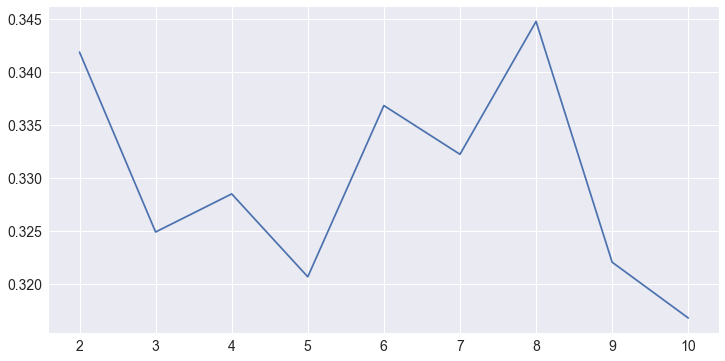

In [41]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init="random", n_init=10, max_iter=300)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.plot(range(2, 11), silhouette_coefficients)
plt.show()

For our data this shows that 2 clusters and 8 cluster is high possibly good choices. But all the values actual difference is not large, so this also an evidence that the whole dataset not showing clear clustering. \
But if we have some knowledge and understandings of the data, we can set the clustering from our understandings. Silhouette score is not always good.\
Sure there are also many other metrics to evaluate the clustering is good or not so good.

## Hierarchical clustering

There are mainly two types of hierarchical clustering:

1. Agglomerative hierarchical clustering
1. Divisive Hierarchical clustering  

The agglomerative method will take all data record (point) as separate clusters (thus each cluster has only one point). Then perform compare and make the most close 2 clusters into one cluster. Through doing this repetitively, finally makes the whole set into one cluster.\
We can decide how many cluster with the decision of what is rule of disimilarity between clusters, together with the dendrogram.\
The divisive method start from all points belong to one big cluster, through repetively divide with the disimilarity rules, until finally each point is one cluster.\
For the agglomerative method, the importance is how we decide the distance between different clusters, and choose 2 nearest cluster to merge into 1.\
For the divisive method, the importance is how we decide the distance inside one cluster, and find the cluster with the biggest internal distance and split it into 2.\
In most case we use the agglomerative method to perform hierarchical clustering.

In [42]:
file_path = pathlib.Path("D:/Edu/data_resource/data-UCI ml/Wholesale customers data.csv")

df_b = pd.read_csv(file_path)
df_b.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [43]:
df_b.shape

(440, 8)

In [44]:
df_b.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [45]:
df_b.isna().any()

Channel             False
Region              False
Fresh               False
Milk                False
Grocery             False
Frozen              False
Detergents_Paper    False
Delicassen          False
dtype: bool

In [46]:
df_c = df_b[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]
df_c

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


### using SciPy

In [47]:
df_cw = sc.vq.whiten(df_c)

In [48]:
df_cw

array([[1.00285375, 1.3098235 , 0.79653552, 0.04413141, 0.56147767,
        0.47499033],
       [0.55861859, 1.33071339, 1.00796876, 0.36336239, 0.69145325,
        0.63048044],
       [0.5028913 , 1.19479343, 0.80949331, 0.49596285, 0.73827805,
        2.78462194],
       ...,
       [1.1502461 , 2.10092651, 3.18603672, 0.09011882, 3.11626408,
        0.66278546],
       [0.81453667, 0.26872   , 0.23513653, 0.21405798, 0.03527608,
        0.75437552],
       [0.22061358, 0.23033143, 0.26442324, 0.0134044 , 0.10015888,
        0.01846001]])

In [49]:
df_cw.mean(axis=0)

array([0.94992056, 0.78625573, 0.83765041, 0.63349857, 0.60504641,
       0.54132939])

In [50]:
df_cw.std(axis=0)

array([1., 1., 1., 1., 1., 1.])

In [51]:
import scipy.spatial.distance as ssd

dist_cw = ssd.pdist(df_cw)
dist_cw

array([0.62085789, 2.41519574, 1.81797539, ..., 4.65765286, 4.73466988,
       0.97011304])

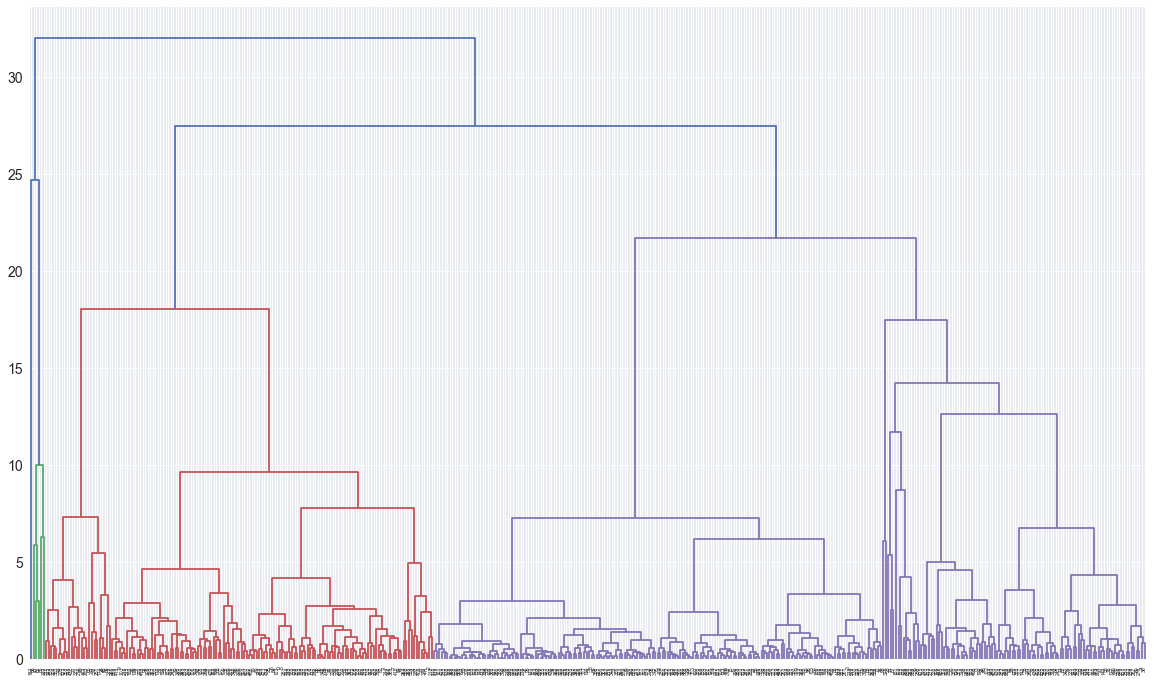

In [52]:
hc_result = sc.hierarchy.linkage(dist_cw,method='ward')

fig, ax = plt.subplots(1, figsize=(20,12))
sc.hierarchy.dendrogram(hc_result)
plt.show()

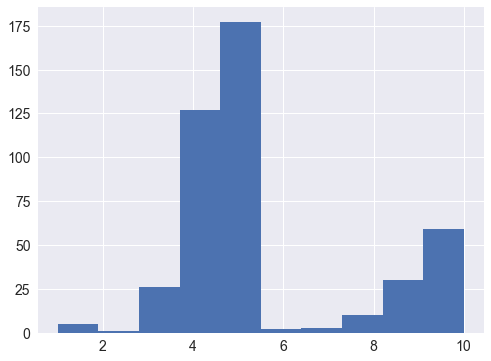

In [53]:
cw_cluster = sc.hierarchy.fcluster(hc_result, 10, criterion='maxclust')

fig, ax = plt.subplots(1, figsize=(8,6))
ax.hist(cw_cluster)
plt.show()

### Using sklearn

In [54]:
from sklearn.preprocessing import MinMaxScaler
# using MinMaxScaler is only for illustration purpose, show how to use this function.
# normally unless you quite sure the range of data is more important and has obvious meaning in your analysis then you use it.
# otherwise most of the case use standard scaler, which scales the standard deviation to 1 for all features.
scaler = MinMaxScaler().fit(df_c)
scaler

MinMaxScaler()

In [55]:
d_scaled = scaler.transform(df_c)
d_scaled

array([[0.11294004, 0.13072723, 0.08146416, 0.0031063 , 0.0654272 ,
        0.02784731],
       [0.06289903, 0.13282409, 0.10309667, 0.02854842, 0.08058985,
        0.03698373],
       [0.05662161, 0.11918086, 0.08278992, 0.03911643, 0.08605232,
        0.16355861],
       ...,
       [0.1295431 , 0.21013575, 0.32594285, 0.00677142, 0.36346267,
        0.03888194],
       [0.091727  , 0.02622442, 0.02402535, 0.01664914, 0.00404174,
        0.04426366],
       [0.02482434, 0.02237109, 0.02702178, 0.00065742, 0.01161082,
        0.00102211]])

In [56]:
d_scaled.mean(axis=0)

array([0.10697737, 0.07817309, 0.08567077, 0.05007777, 0.07050983,
       0.03174532])

In [57]:
d_scaled.std(axis=0)

array([0.11264533, 0.10037697, 0.10231369, 0.07969814, 0.11665769,
       0.05875885])

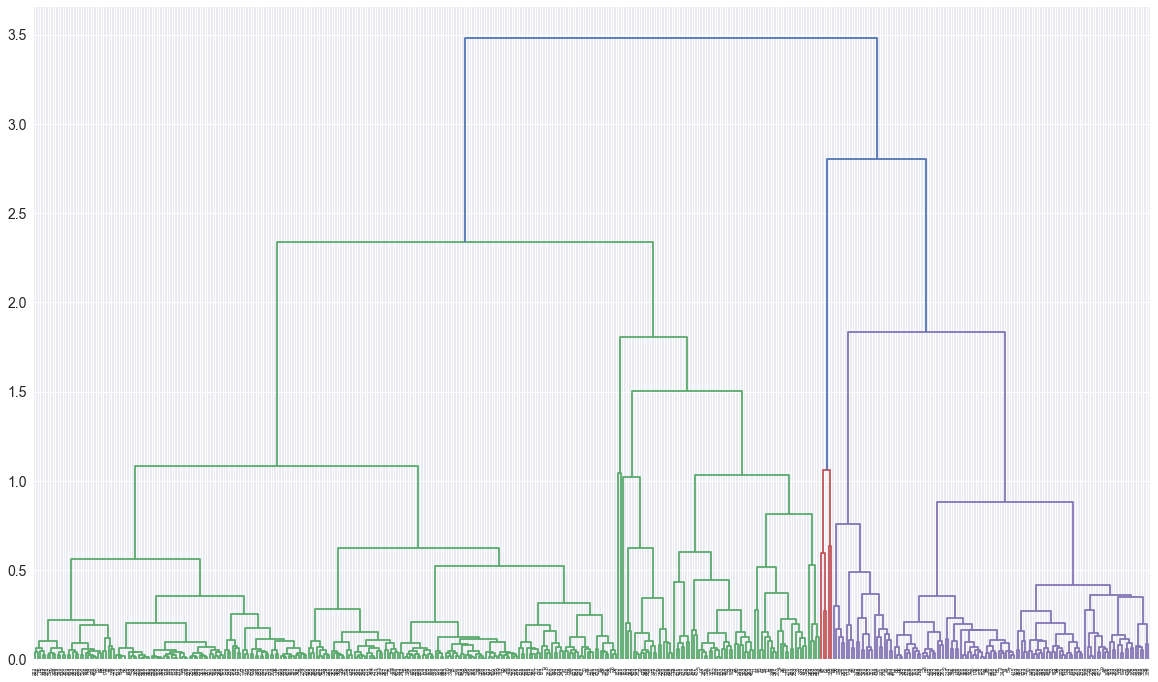

In [58]:
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    fig, ax = plt.subplots(1, figsize=(20,12))
    sc.hierarchy.dendrogram(linkage_matrix, **kwargs)
    
clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward').fit(d_scaled)
plot_dendrogram(clustering)
plt.show()

In [59]:
clustering.labels_

array([236, 315, 407, 226, 291, 296, 325, 370, 386, 413, 237, 399, 221,
       429, 369, 305, 371, 229, 273, 247, 316, 402, 289, 351, 383, 425,
       417, 373, 381, 311, 418, 392, 372, 359, 424, 262, 323, 415, 287,
       295, 261, 244, 389, 404, 292, 299, 285, 343, 427, 423, 321, 306,
       319, 260, 365, 346, 263, 245, 431, 279, 270, 248, 393, 304, 387,
       297, 366, 230, 238, 380, 255, 322, 309, 223, 239, 320, 419, 337,
       385, 334, 433, 358, 256, 428, 395, 127, 327, 335, 241, 288, 374,
       280, 283, 432, 377, 341, 430, 439, 406, 349, 147, 336, 347, 219,
       376, 330, 298, 264, 375, 312, 408, 227, 211, 318, 436, 249, 410,
       155, 130, 354, 396, 344, 422, 326, 352, 139, 420, 290, 268, 246,
       357, 388, 251, 340, 438, 426, 233, 145, 250, 272, 391, 403, 152,
       187, 148, 367, 384, 171, 362, 379, 400, 203, 201, 434, 409, 437,
       267, 416, 414, 405, 144, 274, 314, 124, 252, 125, 368, 353, 216,
       397, 317, 435, 293, 277, 363, 282, 281, 182, 329, 235, 30

In [60]:
clustering = AgglomerativeClustering(distance_threshold=1.5, n_clusters=None).fit(d_scaled)
clustering.labels_

array([0, 3, 3, 1, 1, 0, 0, 3, 3, 3, 3, 0, 1, 1, 1, 0, 3, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 4, 6, 0, 0, 0, 1, 0, 3, 1, 3, 3, 6, 1, 0, 3, 3,
       3, 4, 3, 2, 3, 4, 0, 3, 6, 3, 0, 3, 4, 3, 0, 3, 0, 2, 3, 3, 0, 4,
       3, 1, 0, 0, 1, 1, 0, 1, 3, 0, 0, 4, 0, 0, 0, 3, 3, 0, 0, 2, 2, 1,
       0, 1, 0, 1, 4, 1, 3, 0, 3, 0, 0, 0, 3, 3, 3, 6, 0, 0, 3, 3, 0, 3,
       0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 1, 0, 0, 6, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 4, 3, 0, 3, 3, 3, 0, 0, 4, 3, 3, 3, 0, 0, 0, 3, 4, 3, 3, 0, 3,
       6, 0, 0, 0, 0, 6, 3, 5, 0, 0, 0, 3, 3, 3, 1, 0, 0, 3, 0, 1, 1, 3,
       0, 0, 3, 4, 1, 0, 0, 3, 0, 3, 3, 4, 0, 4, 0, 3, 3, 3, 4, 0, 3, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 6, 1, 0,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 4, 0, 1, 1, 0, 0, 3, 6, 6, 0, 0, 0, 3,
       3, 1, 3, 0, 3, 0, 0, 0, 0, 6, 0, 0, 1, 1, 0, 0, 0, 0, 6, 1, 6, 6,
       0, 1, 0, 6, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0,

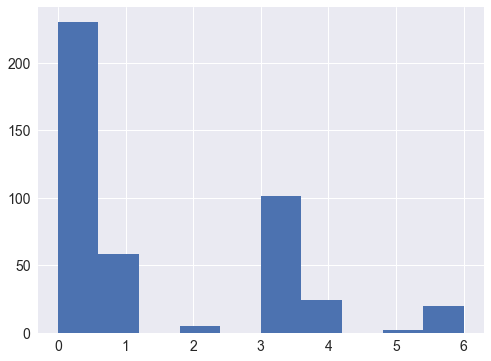

In [61]:
fig, ax = plt.subplots(1, figsize=(8,6))
ax.hist(clustering.labels_)
plt.show()